**EMPLOYEE** **ATTRITION PREDICTION**







In [ ]:
#importing the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython import get_ipython
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv('employee_attire.csv') #Loading the dataset

In [ ]:
data.head() #displaying 1st 5rows in data

,table id,name,phone number,Location,Emp. Group,Function,Gender,Tenure,Tenure Grp.,Experience (YY.MM),Marital Status,Age in YY.,Hiring Source,Promoted/Non Promoted,Job Role Match,Stay/Left
0,1,sid,9876544345,Pune,B2,Operation,Male,0.00,< =1,6.08,Single,27.12,Direct,Non Promoted,Yes,Left
1,2,sid,9876544345,Noida,B7,Support,Male,0.00,< =1,13.00,Marr.,38.08,Direct,Promoted,No,Stay
2,3,sid,9876544345,Bangalore,B3,Operation,Male,0.01,< =1,16.05,Marr.,36.04,Direct,Promoted,Yes,Stay
3,4,sid,9876544345,Noida,B2,Operation,Male,0.01,< =1,6.06,Marr.,32.07,Direct,Promoted,Yes,Stay
4,5,sid,9876544345,Lucknow,B2,Operation,Male,0.00,< =1,7.00,Marr.,32.05,Direct,Non Promoted,Yes,Stay


In [ ]:
data.tail() #displaying last 5rows in data

,table id,name,phone number,Location,Emp. Group,Function,Gender,Tenure,Tenure Grp.,Experience (YY.MM),Marital Status,Age in YY.,Hiring Source,Promoted/Non Promoted,Job Role Match,Stay/Left
897,898,Rahul,9876544345,Vijayawada,B1,Operation,Female,0.03,< =1,0.03,Single,21.09,Direct,Non Promoted,Yes,Stay
898,899,Rahul,9876544345,Vijayawada,B1,Operation,Female,0.03,< =1,0.03,Single,22.02,Direct,Non Promoted,Yes,Left
899,900,Rahul,9876544345,Vijayawada,B1,Operation,Female,0.03,< =1,0.03,Single,22.01,Direct,Non Promoted,NaN,Left
900,901,Rahul,9876544345,Vijayawada,B1,Operation,Female,0.03,< =1,0.03,Single,22.02,Direct,Non Promoted,Yes,Stay
901,902,Rahul,9876544345,Madurai,B2,Operation,Male,0.02,< =1,10.02,Marr.,32.08,Direct,Non Promoted,No,Stay


In [ ]:
data.shape #By using this command we check how many rows and columns present in the data

(902, 16)

In [ ]:
data.columns #we checking the column name in the dataset

Index(['table id', 'name', 'phone number', 'Location', 'Emp. Group',
       'Function', 'Gender ', 'Tenure', 'Tenure Grp.', 'Experience (YY.MM)',
       'Marital Status', 'Age in YY.', 'Hiring Source',
       'Promoted/Non Promoted', 'Job Role Match', 'Stay/Left'],
      dtype='object')

In [ ]:
data.duplicated().sum() #We checking the No. of duplicate data present in the dataset

0

In [ ]:
data.isnull().sum() #We checking the null values present in the dataset

table id                 0
name                     0
phone number             0
Location                 0
Emp. Group               0
Function                 0
Gender                   0
Tenure                   0
Tenure Grp.              0
Experience (YY.MM)       4
Marital Status           0
Age in YY.               0
Hiring Source            0
Promoted/Non Promoted    0
Job Role Match           2
Stay/Left                0
dtype: int64

In [ ]:
data.dropna(axis=0,inplace=True) #we are droping the null value in the dataset

In [ ]:
data.shape #By using this command we check how many rows and columns present in the dataset after cleaning

(896, 16)

In [ ]:
data.info() #By this we checking the datatype of each column

<class 'pandas.core.frame.DataFrame'>
Int64Index: 896 entries, 0 to 901
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   table id               896 non-null    int64  
 1   name                   896 non-null    object 
 2   phone number           896 non-null    int64  
 3   Location               896 non-null    object 
 4   Emp. Group             896 non-null    object 
 5   Function               896 non-null    object 
 6   Gender                 896 non-null    object 
 7   Tenure                 896 non-null    float64
 8   Tenure Grp.            896 non-null    object 
 9   Experience (YY.MM)     896 non-null    float64
 10  Marital Status         896 non-null    object 
 11  Age in YY.             896 non-null    float64
 12  Hiring Source          896 non-null    object 
 13  Promoted/Non Promoted  896 non-null    object 
 14  Job Role Match         896 non-null    object 
 15  Stay/L

In [ ]:
data.describe() #statistical analysis of the dataset

,table id,phone number,Tenure,Experience (YY.MM),Age in YY.
count,896.000000,8.960000e+02,896.000000,896.000000,896.000000
mean,451.245536,9.876544e+09,1.205982,5.161886,29.078795
std,259.236205,0.000000e+00,0.820552,3.478917,4.493532
min,1.000000,9.876544e+09,0.000000,0.030000,21.050000
25%,227.750000,9.876544e+09,0.110000,2.100000,26.050000
50%,451.500000,9.876544e+09,1.060000,4.110000,28.060000
75%,675.250000,9.876544e+09,2.040000,7.030000,31.070000
max,902.000000,9.876544e+09,3.000000,25.080000,52.060000


In [ ]:
data['Gender '].unique() # checking the unique value in the gender column

array(['Male', 'Female', 'other'], dtype=object)

In [ ]:
data['Gender '].value_counts() #checking the total value counts in the genders

Male      656
Female    234
other       6
Name: Gender , dtype: int64

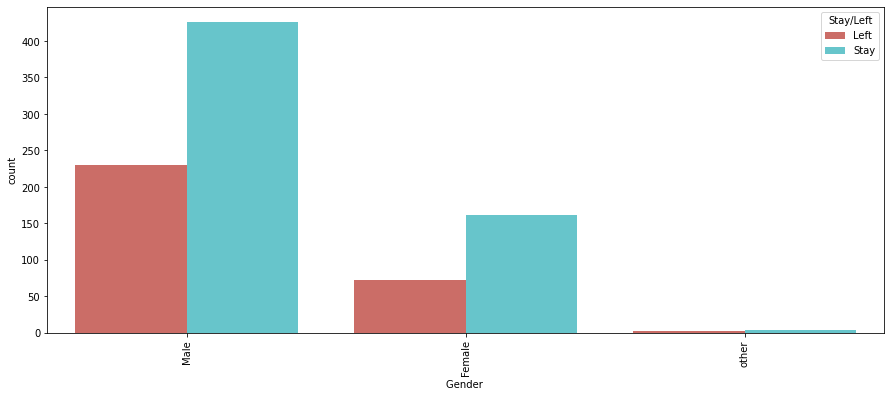

In [ ]:
#here we are plotting the graph visualization of genders who are all stay\left the company and it counts
plt.figure(figsize=(15,6))
sns.countplot('Gender ', hue = data['Stay/Left'], 
              data = data, palette='hls')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
data["Promoted/Non Promoted"].unique() # checking the unique value in the Promoted/Non Promoted column

array(['Non Promoted', 'Promoted'], dtype=object)

In [ ]:
data["Promoted/Non Promoted"].value_counts() #checking the total value counts in the Promoted/Non Promoted column

Promoted        457
Non Promoted    439
Name: Promoted/Non Promoted, dtype: int64

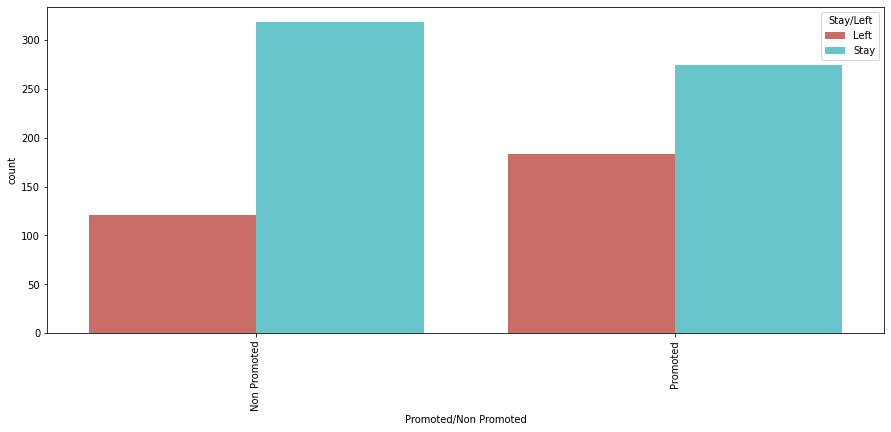

In [ ]:
#here we are plotting the graph visualization of Promoted/Non Promoted column who are all stay\left the company and it counts
plt.figure(figsize=(15,6))
sns.countplot('Promoted/Non Promoted', hue = data['Stay/Left'], 
              data = data, palette='hls')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
data["Function"].unique() # checking the unique value in the Function column

array(['Operation', 'Support', 'Sales'], dtype=object)

In [ ]:
data["Function"].value_counts() # checking the total value counts in the Function column

Operation    832
Support       52
Sales         12
Name: Function, dtype: int64

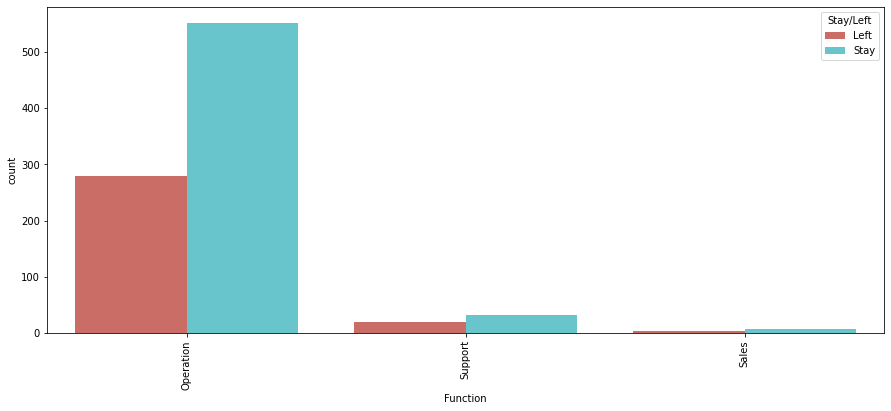

In [ ]:
#here we are plotting the graph visualization of Function column who are all stay\left the company and it counts
plt.figure(figsize=(15,6))
sns.countplot('Function', hue = data['Stay/Left'], 
              data = data, palette='hls')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
data["Hiring Source"].unique() # checking the unique value in the Hiring Source column

array(['Direct', 'Agency', 'Employee Referral'], dtype=object)

In [ ]:
data["Hiring Source"].value_counts() # checking the total value counts in the Hiring Source column

Direct               709
Agency               116
Employee Referral     71
Name: Hiring Source, dtype: int64

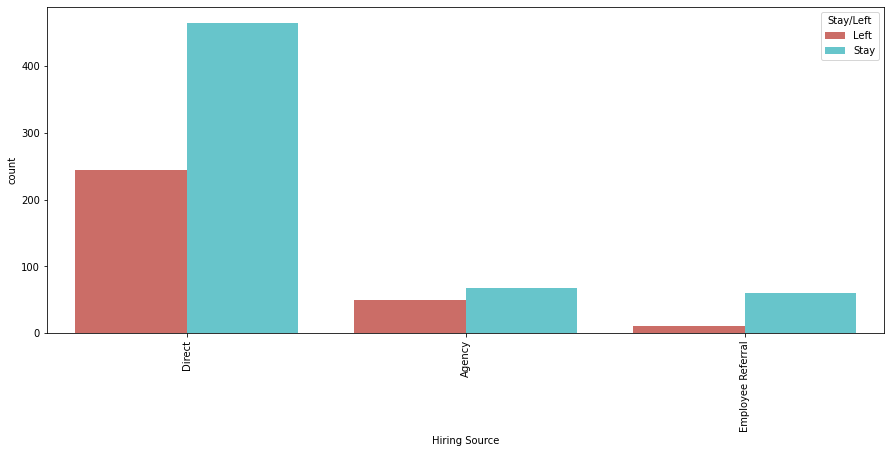

In [ ]:
#here we are plotting the graph visualization of Hiring Source column who are all stay\left the company and it counts
plt.figure(figsize=(15,6))
sns.countplot('Hiring Source', hue = data['Stay/Left'] ,
              data = data, palette='hls')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
data["Marital Status"].unique()  # checking the unique value in the Marital Status column

array(['Single', 'Marr.', 'Div.', 'NTBD', 'Sep.'], dtype=object)

In [ ]:
data["Marital Status"].value_counts() # checking the total value counts in theMarital Status column

Single    534
Marr.     356
Div.        2
NTBD        2
Sep.        2
Name: Marital Status, dtype: int64

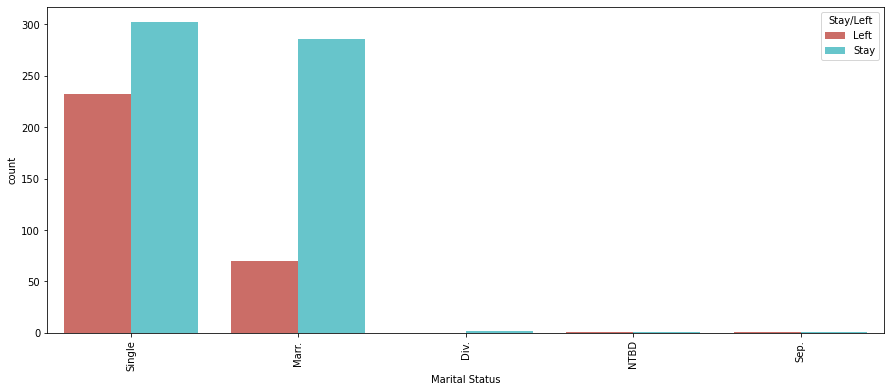

In [ ]:
#here we are plotting the graph visualization of Marital status column who are all stay\left the company and it counts
plt.figure(figsize=(15,6))
sns.countplot('Marital Status', hue = data['Stay/Left'], 
              data = data, palette='hls')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
data["Emp. Group"].unique() # checking the unique value in the Emp. Group column

array(['B2', 'B7', 'B3', 'B1', 'B5', 'B0', 'B4', 'B6', 'C3', 'D2'],
      dtype=object)

In [ ]:
data["Emp. Group"].value_counts()  # checking the total value counts in the Emp. Group column

B1    537
B2    276
B3     59
B0      8
B4      7
B5      4
B7      2
B6      1
C3      1
D2      1
Name: Emp. Group, dtype: int64

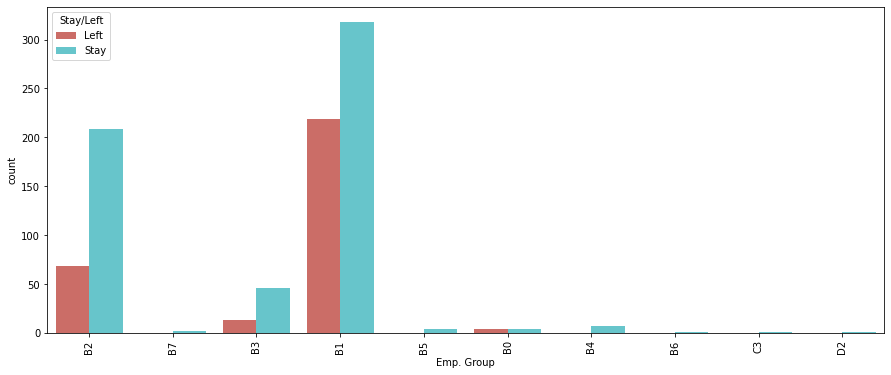

In [ ]:
#here we are plotting the graph visualization of Emp. Group column who are all stay\left the company and it counts
plt.figure(figsize=(15,6))
sns.countplot('Emp. Group', hue = data['Stay/Left'], 
              data = data, palette='hls')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
data["Job Role Match"].unique()  # checking the unique value in the Job Role Match column

array(['Yes', 'No'], dtype=object)

In [ ]:
data["Job Role Match"].value_counts()  # checking the total value counts in the Job Role Match column

Yes    481
No     415
Name: Job Role Match, dtype: int64

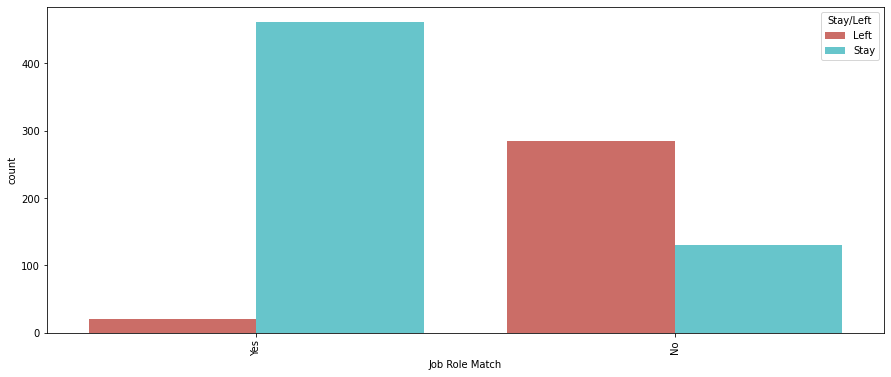

In [ ]:
#here we are plotting the graph visualization of Job Role Match column who are all stay\left the company and it counts
plt.figure(figsize=(15,6))
sns.countplot('Job Role Match', hue = data['Stay/Left'], 
              data = data, palette='hls')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
data["Tenure Grp."].unique() # checking the unique value in the Tenure Grp. column

array(['< =1', '> 1 & < =3'], dtype=object)

In [ ]:
data["Tenure Grp."].value_counts() # checking the total value count in the Tenure Grp. column

> 1 & < =3    626
< =1          270
Name: Tenure Grp., dtype: int64

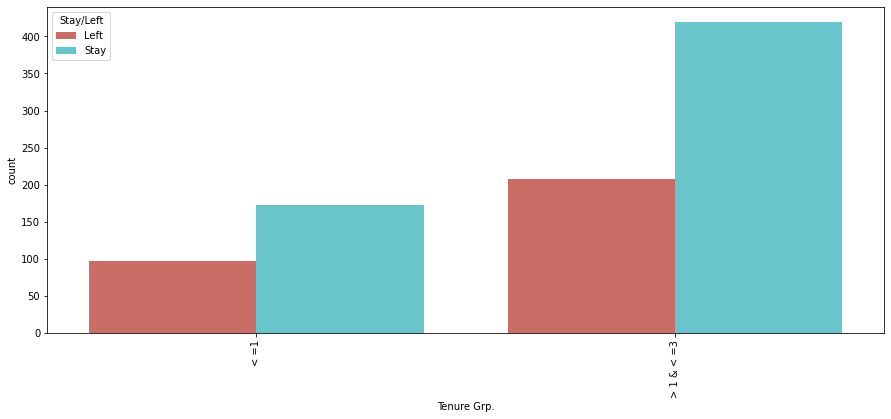

In [ ]:
#here we are plotting the graph visualization of Tenure Grp. column who are all stay\left the company and it counts
plt.figure(figsize=(15,6))
sns.countplot('Tenure Grp.', hue = data['Stay/Left'], 
              data = data, palette='hls')
plt.xticks(rotation = 90)
plt.show()

<Figure size 1080x432 with 0 Axes>

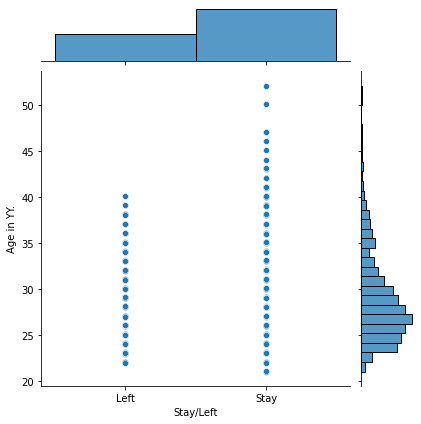

In [ ]:
#here we are plotting the graph visualization of Age in YY. and stay\left the company
plt.figure(figsize=(15,6))
sns.jointplot(x='Stay/Left',y='Age in YY.',data = data)
plt.xticks(rotation = 90)
plt.show()

<Figure size 1080x432 with 0 Axes>

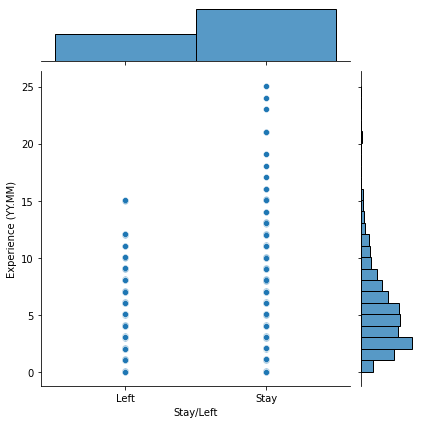

In [ ]:
#here we are plotting the graph visualization ofExperience (YY.MM) and stay\left the company
plt.figure(figsize=(15,6))
sns.jointplot(x='Stay/Left',y='Experience (YY.MM)',data = data)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
corr_matrix=data.corr()
corr_matrix

,table id,phone number,Tenure,Experience (YY.MM),Age in YY.
table id,1.000000,NaN,0.853930,-0.067206,-0.111546
phone number,NaN,NaN,NaN,NaN,NaN
Tenure,0.853930,NaN,1.000000,-0.050179,-0.079193
Experience (YY.MM),-0.067206,NaN,-0.050179,1.000000,0.834944
Age in YY.,-0.111546,NaN,-0.079193,0.834944,1.000000


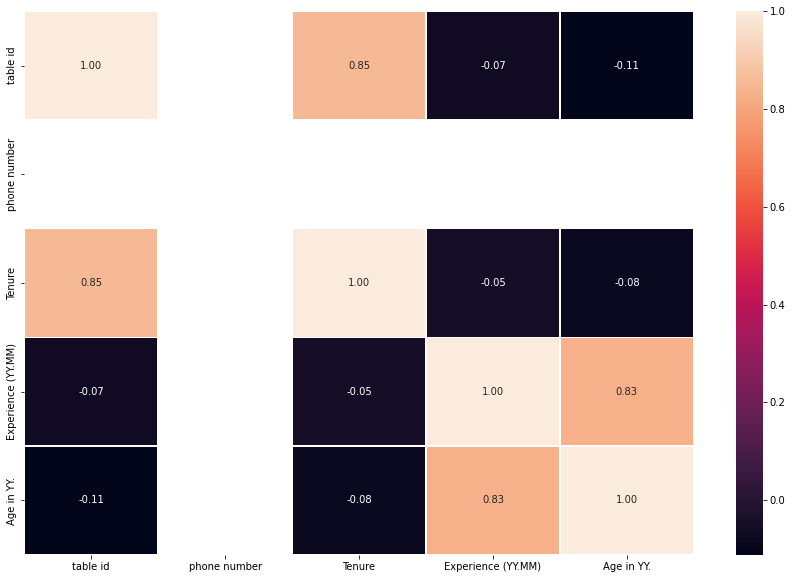

In [ ]:
#graphical visualization of correlation matrix
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
               annot=True,
               linewidths=0.5,
               fmt=".2f"
              )

In [ ]:
location_dict = data["Location"].value_counts()
print(location_dict)

location_dict_new = {
    'Chennai':       7,
    'Noida':         6,
    'Bangalore':     5,
    'Hyderabad':     4,
    'Pune':          3,
    'Madurai':       2,
    'Lucknow':       1,
    'other place':   0,
}

print(location_dict_new)

Chennai       255
Noida         236
Bangalore     210
Hyderabad      62
Pune           56
Madurai        29
Lucknow        20
Nagpur         14
Vijayawada      6
Mumbai          4
Gurgaon         3
Kolkata         1
Name: Location, dtype: int64
{'Chennai': 7, 'Noida': 6, 'Bangalore': 5, 'Hyderabad': 4, 'Pune': 3, 'Madurai': 2, 'Lucknow': 1, 'other place': 0}


In [ ]:
#Creating new Location column in order to not making chaos in the original dataset
def location(x):
    if str(x) in location_dict_new.keys():
        return location_dict_new[str(x)]
    else:
        return location_dict_new['other place']
    
data_l = data["Location"].apply(location)
data['New Location'] = data_l
data.head()

,table id,name,phone number,Location,Emp. Group,Function,Gender,Tenure,Tenure Grp.,Experience (YY.MM),Marital Status,Age in YY.,Hiring Source,Promoted/Non Promoted,Job Role Match,Stay/Left,New Location
0,1,sid,9876544345,Pune,B2,Operation,Male,0.00,< =1,6.08,Single,27.12,Direct,Non Promoted,Yes,Left,3
1,2,sid,9876544345,Noida,B7,Support,Male,0.00,< =1,13.00,Marr.,38.08,Direct,Promoted,No,Stay,6
2,3,sid,9876544345,Bangalore,B3,Operation,Male,0.01,< =1,16.05,Marr.,36.04,Direct,Promoted,Yes,Stay,5
3,4,sid,9876544345,Noida,B2,Operation,Male,0.01,< =1,6.06,Marr.,32.07,Direct,Promoted,Yes,Stay,6
4,5,sid,9876544345,Lucknow,B2,Operation,Male,0.00,< =1,7.00,Marr.,32.05,Direct,Non Promoted,Yes,Stay,1


In [ ]:
#we getting numerical value of Function column
gen = pd.get_dummies(data["Function"])
gen.head()

,Operation,Sales,Support
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0


In [ ]:
#we getting numerical value of Hiring Source column
hr = pd.get_dummies(data["Hiring Source"])
hr.head()

,Agency,Direct,Employee Referral
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [ ]:
Marital_dict = data["Marital Status"].value_counts()

In [ ]:
#Creating new marital status column in order to not making chaos in the original dataset
def Mar(x):
    if str(x) in Marital_dict.keys() and Marital_dict[str(x)] > 100:
        return str(x)
    else:
        return 'other status'
    
data_l = data["Marital Status"].apply(Mar)
data['New Marital'] = data_l
data.head()

,table id,name,phone number,Location,Emp. Group,Function,Gender,Tenure,Tenure Grp.,Experience (YY.MM),Marital Status,Age in YY.,Hiring Source,Promoted/Non Promoted,Job Role Match,Stay/Left,New Location,New Marital
0,1,sid,9876544345,Pune,B2,Operation,Male,0.00,< =1,6.08,Single,27.12,Direct,Non Promoted,Yes,Left,3,Single
1,2,sid,9876544345,Noida,B7,Support,Male,0.00,< =1,13.00,Marr.,38.08,Direct,Promoted,No,Stay,6,Marr.
2,3,sid,9876544345,Bangalore,B3,Operation,Male,0.01,< =1,16.05,Marr.,36.04,Direct,Promoted,Yes,Stay,5,Marr.
3,4,sid,9876544345,Noida,B2,Operation,Male,0.01,< =1,6.06,Marr.,32.07,Direct,Promoted,Yes,Stay,6,Marr.
4,5,sid,9876544345,Lucknow,B2,Operation,Male,0.00,< =1,7.00,Marr.,32.05,Direct,Non Promoted,Yes,Stay,1,Marr.


In [ ]:
#we getting numerical value of New Marital column
Mr = pd.get_dummies(data["New Marital"])
Mr.head()

,Marr.,Single,other status
0,0,1,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [ ]:
#Creating new Promoted/Non Promoted status column in order to not making chaos in the original dataset
def Promoted(x):
    if x == 'Promoted':
        return int(1)
    else:
        return int(0)

data_l = data["Promoted/Non Promoted"].apply(Promoted)
data['New Promotion'] = data_l
data.head()

,table id,name,phone number,Location,Emp. Group,Function,Gender,Tenure,Tenure Grp.,Experience (YY.MM),Marital Status,Age in YY.,Hiring Source,Promoted/Non Promoted,Job Role Match,Stay/Left,New Location,New Marital,New Promotion
0,1,sid,9876544345,Pune,B2,Operation,Male,0.00,< =1,6.08,Single,27.12,Direct,Non Promoted,Yes,Left,3,Single,0
1,2,sid,9876544345,Noida,B7,Support,Male,0.00,< =1,13.00,Marr.,38.08,Direct,Promoted,No,Stay,6,Marr.,1
2,3,sid,9876544345,Bangalore,B3,Operation,Male,0.01,< =1,16.05,Marr.,36.04,Direct,Promoted,Yes,Stay,5,Marr.,1
3,4,sid,9876544345,Noida,B2,Operation,Male,0.01,< =1,6.06,Marr.,32.07,Direct,Promoted,Yes,Stay,6,Marr.,1
4,5,sid,9876544345,Lucknow,B2,Operation,Male,0.00,< =1,7.00,Marr.,32.05,Direct,Non Promoted,Yes,Stay,1,Marr.,0


In [ ]:
Emp_dict_new = {
    'B1': 4,
    'B2': 3,
    'B3': 2,
    'other group': 1,
}

In [ ]:
#Creating new Emp. Group column in order to not making chaos in the original dataset
def emp(x):
    if str(x) in Emp_dict_new.keys():
        return str(x)
    else:
        return 'other group'
 
data_l = data["Emp. Group"].apply(emp)
data['New EMP'] = data_l
#we getting numerical value of New EMP column
emp = pd.get_dummies(data["New EMP"])
data.head()

,table id,name,phone number,Location,Emp. Group,Function,Gender,Tenure,Tenure Grp.,Experience (YY.MM),Marital Status,Age in YY.,Hiring Source,Promoted/Non Promoted,Job Role Match,Stay/Left,New Location,New Marital,New Promotion,New EMP
0,1,sid,9876544345,Pune,B2,Operation,Male,0.00,< =1,6.08,Single,27.12,Direct,Non Promoted,Yes,Left,3,Single,0,B2
1,2,sid,9876544345,Noida,B7,Support,Male,0.00,< =1,13.00,Marr.,38.08,Direct,Promoted,No,Stay,6,Marr.,1,other group
2,3,sid,9876544345,Bangalore,B3,Operation,Male,0.01,< =1,16.05,Marr.,36.04,Direct,Promoted,Yes,Stay,5,Marr.,1,B3
3,4,sid,9876544345,Noida,B2,Operation,Male,0.01,< =1,6.06,Marr.,32.07,Direct,Promoted,Yes,Stay,6,Marr.,1,B2
4,5,sid,9876544345,Lucknow,B2,Operation,Male,0.00,< =1,7.00,Marr.,32.05,Direct,Non Promoted,Yes,Stay,1,Marr.,0,B2


In [ ]:
#Creating new job Role Match column in order to not making chaos in the original dataset
def Job(x):
    if x == 'Yes':
        return int(1)
    else:
        return int(0)
    
data_l = data["Job Role Match"].apply(Job)
data['New Job Role Match'] = data_l
data.head()

,table id,name,phone number,Location,Emp. Group,Function,Gender,Tenure,Tenure Grp.,Experience (YY.MM),...,Age in YY.,Hiring Source,Promoted/Non Promoted,Job Role Match,Stay/Left,New Location,New Marital,New Promotion,New EMP,New Job Role Match
0,1,sid,9876544345,Pune,B2,Operation,Male,0.00,< =1,6.08,...,27.12,Direct,Non Promoted,Yes,Left,3,Single,0,B2,1
1,2,sid,9876544345,Noida,B7,Support,Male,0.00,< =1,13.00,...,38.08,Direct,Promoted,No,Stay,6,Marr.,1,other group,0
2,3,sid,9876544345,Bangalore,B3,Operation,Male,0.01,< =1,16.05,...,36.04,Direct,Promoted,Yes,Stay,5,Marr.,1,B3,1
3,4,sid,9876544345,Noida,B2,Operation,Male,0.01,< =1,6.06,...,32.07,Direct,Promoted,Yes,Stay,6,Marr.,1,B2,1
4,5,sid,9876544345,Lucknow,B2,Operation,Male,0.00,< =1,7.00,...,32.05,Direct,Non Promoted,Yes,Stay,1,Marr.,0,B2,1


In [ ]:
gender_dict = data["Gender "].value_counts()

In [ ]:
#Creating new gender column in order to not making chaos in the original dataset
def Gen(x):
    if x in gender_dict.keys():
        return str(x)
    else:
        return 'other'

data_l = data["Gender "].apply(Gen)
data['New Gender'] = data_l
data.head()

,table id,name,phone number,Location,Emp. Group,Function,Gender,Tenure,Tenure Grp.,Experience (YY.MM),...,Hiring Source,Promoted/Non Promoted,Job Role Match,Stay/Left,New Location,New Marital,New Promotion,New EMP,New Job Role Match,New Gender
0,1,sid,9876544345,Pune,B2,Operation,Male,0.00,< =1,6.08,...,Direct,Non Promoted,Yes,Left,3,Single,0,B2,1,Male
1,2,sid,9876544345,Noida,B7,Support,Male,0.00,< =1,13.00,...,Direct,Promoted,No,Stay,6,Marr.,1,other group,0,Male
2,3,sid,9876544345,Bangalore,B3,Operation,Male,0.01,< =1,16.05,...,Direct,Promoted,Yes,Stay,5,Marr.,1,B3,1,Male
3,4,sid,9876544345,Noida,B2,Operation,Male,0.01,< =1,6.06,...,Direct,Promoted,Yes,Stay,6,Marr.,1,B2,1,Male
4,5,sid,9876544345,Lucknow,B2,Operation,Male,0.00,< =1,7.00,...,Direct,Non Promoted,Yes,Stay,1,Marr.,0,B2,1,Male


In [ ]:
#we getting numerical value of gender column
gend = pd.get_dummies(data["New Gender"])
gend.head()

,Female,Male,other
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [ ]:
#we getting numerical value of Tenure Grp. data
tengrp = pd.get_dummies(data["Tenure Grp."])
tengrp.head()

,< =1,> 1 & < =3
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [ ]:
#we are joining the new columns to the dataset which we created above
dataset = pd.concat([data, hr, Mr, emp, tengrp, gen, gend], axis = 1)
dataset.head()

,table id,name,phone number,Location,Emp. Group,Function,Gender,Tenure,Tenure Grp.,Experience (YY.MM),...,B3,other group,< =1,> 1 & < =3,Operation,Sales,Support,Female,Male,other
0,1,sid,9876544345,Pune,B2,Operation,Male,0.00,< =1,6.08,...,0,0,1,0,1,0,0,0,1,0
1,2,sid,9876544345,Noida,B7,Support,Male,0.00,< =1,13.00,...,0,1,1,0,0,0,1,0,1,0
2,3,sid,9876544345,Bangalore,B3,Operation,Male,0.01,< =1,16.05,...,1,0,1,0,1,0,0,0,1,0
3,4,sid,9876544345,Noida,B2,Operation,Male,0.01,< =1,6.06,...,0,0,1,0,1,0,0,0,1,0
4,5,sid,9876544345,Lucknow,B2,Operation,Male,0.00,< =1,7.00,...,0,0,1,0,1,0,0,0,1,0


In [ ]:
#droping the unwanted columns in the new dataset
dataset.drop(["table id", "name", "Marital Status","Promoted/Non Promoted","Function","Emp. Group","Job Role Match","Location"
              ,"Hiring Source","Gender ", 'Tenure', 'New Gender', 'New Marital', 'New EMP'],axis=1,inplace=True)

dataset1 = dataset.drop(['Tenure Grp.', 'phone number'], axis = 1)
dataset1.columns

Index(['Experience (YY.MM)', 'Age in YY.', 'Stay/Left', 'New Location',
       'New Promotion', 'New Job Role Match', 'Agency', 'Direct',
       'Employee Referral', 'Marr.', 'Single', 'other status', 'B1', 'B2',
       'B3', 'other group', '< =1', '> 1 & < =3', 'Operation', 'Sales',
       'Support', 'Female', 'Male', 'other'],
      dtype='object')

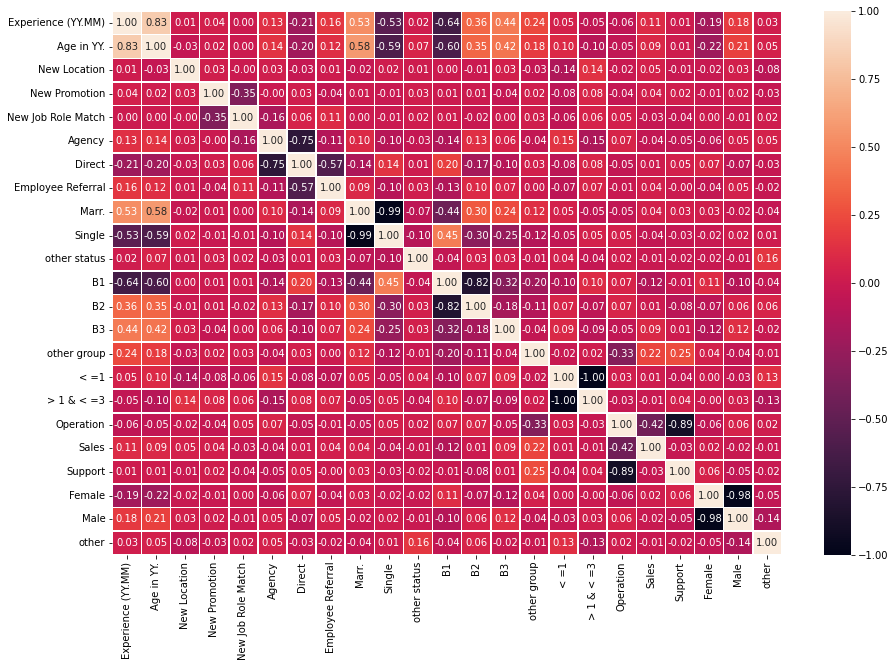

In [ ]:
#graphical visualization of corr_matrix for each and every columns in the data set
corr_matrix=dataset1.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
               annot=True,
               linewidths=0.5,
               fmt=".2f"
              )

In [ ]:
#Eporting the cleaned dataset as csv file
dataset1.to_csv("cleaned_employee_attire.csv")

In [ ]:
#Loading new cleaned dataset csv file
dataset = pd.read_csv("cleaned_employee_attire.csv")
dataset = pd.DataFrame(dataset)

In [ ]:
dataset.head() #new cleaned dataset 1st five rows

,Unnamed: 0,Experience (YY.MM),Age in YY.,Stay/Left,New Location,New Promotion,New Job Role Match,Agency,Direct,Employee Referral,...,B3,other group,< =1,> 1 & < =3,Operation,Sales,Support,Female,Male,other
0,0,6.08,27.12,Left,3,0,1,0,1,0,...,0,0,1,0,1,0,0,0,1,0
1,1,13.00,38.08,Stay,6,1,0,0,1,0,...,0,1,1,0,0,0,1,0,1,0
2,2,16.05,36.04,Stay,5,1,1,0,1,0,...,1,0,1,0,1,0,0,0,1,0
3,3,6.06,32.07,Stay,6,1,1,0,1,0,...,0,0,1,0,1,0,0,0,1,0
4,4,7.00,32.05,Stay,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,1,0


In [ ]:
dataset_new = dataset.copy()

In [ ]:
dataset_new = dataset_new.drop('Unnamed: 0', axis = 1)

In [ ]:
y = dataset_new["Stay/Left"]
X = dataset_new.drop("Stay/Left",axis=1)

In [ ]:
X.shape

(896, 23)

In [ ]:
y.shape

(896,)

In [ ]:
#importing the packages for training our datas
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn.metrics import accuracy_score

In [ ]:
#Splitting the datas 80% for train and 20% for test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,
                                                 random_state=4)
X_train.head()

,Experience (YY.MM),Age in YY.,New Location,New Promotion,New Job Role Match,Agency,Direct,Employee Referral,Marr.,Single,...,B3,other group,< =1,> 1 & < =3,Operation,Sales,Support,Female,Male,other
385,7.05,30.02,6,0,1,0,1,0,0,1,...,0,0,0,1,1,0,0,0,1,0
215,3.07,24.03,6,0,0,0,1,0,0,1,...,0,0,1,0,0,0,1,0,1,0
399,5.00,29.02,3,0,1,0,1,0,1,0,...,0,0,0,1,1,0,0,0,1,0
411,3.08,30.10,6,1,0,0,1,0,0,1,...,0,0,0,1,1,0,0,1,0,0
354,8.04,29.06,5,1,1,0,1,0,0,1,...,0,0,0,1,1,0,0,0,1,0


In [ ]:
#importing all ML models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

In [ ]:
lr=LogisticRegression(C = 0.1, random_state = 42, 
                      solver = 'liblinear')
dt=DecisionTreeClassifier()
rm=RandomForestClassifier()
gnb=GaussianNB()
knn = KNeighborsClassifier(n_neighbors=3)
svm = svm.SVC(kernel='linear')

In [ ]:
for a,b in zip([lr,dt,knn,svm,rm,gnb],["Logistic Regression","Decision Tree","KNN","SVM","Random Forest","Naive Bayes"]):
    a.fit(X_train,y_train)
    prediction=a.predict(X_train)
    y_pred=a.predict(X_test)
    score1=accuracy_score(y_train,prediction)
    score=accuracy_score(y_test,y_pred)
    msg1="[%s] training data accuracy is : %f" % (b,score1)
    msg2="[%s] test data accuracy is : %f" % (b,score)
    print(msg1)
    print(msg2)

[Logistic Regression] training data accuracy is : 0.888268
[Logistic Regression] test data accuracy is : 0.855556
[Decision Tree] training data accuracy is : 0.998603
[Decision Tree] test data accuracy is : 0.877778
[KNN] training data accuracy is : 0.889665
[KNN] test data accuracy is : 0.744444
[SVM] training data accuracy is : 0.882682
[SVM] test data accuracy is : 0.838889
[Random Forest] training data accuracy is : 0.998603
[Random Forest] test data accuracy is : 0.861111
[Naive Bayes] training data accuracy is : 0.768156
[Naive Bayes] test data accuracy is : 0.738889


In [ ]:
model_scores={'Logistic Regression':lr.score(X_test,y_test),
             'KNN classifier':knn.score(X_test,y_test),
             'Support Vector Machine':svm.score(X_test,y_test),
             'Random forest':rm.score(X_test,y_test),
              'Decision tree':dt.score(X_test,y_test),
              'Naive Bayes':gnb.score(X_test,y_test)
             }
model_scores

{'Decision tree': 0.8777777777777778,
 'KNN classifier': 0.7444444444444445,
 'Logistic Regression': 0.8555555555555555,
 'Naive Bayes': 0.7388888888888889,
 'Random forest': 0.8611111111111112,
 'Support Vector Machine': 0.8388888888888889}

In [ ]:
from sklearn.metrics import classification_report

rm_y_preds = rm.predict(X_test)

print(classification_report(y_test,rm_y_preds))

              precision    recall  f1-score   support

        Left       0.82      0.76      0.79        62
        Stay       0.88      0.92      0.90       118

    accuracy                           0.86       180
   macro avg       0.85      0.84      0.84       180
weighted avg       0.86      0.86      0.86       180



In [ ]:
from sklearn.metrics import classification_report

lr_y_preds = lr.predict(X_test)

print(classification_report(y_test,lr_y_preds))

              precision    recall  f1-score   support

        Left       0.82      0.74      0.78        62
        Stay       0.87      0.92      0.89       118

    accuracy                           0.86       180
   macro avg       0.85      0.83      0.84       180
weighted avg       0.85      0.86      0.85       180



In [ ]:
model_compare=pd.DataFrame(model_scores,index=['accuracy'])
model_compare

,Logistic Regression,KNN classifier,Support Vector Machine,Random forest,Decision tree,Naive Bayes
accuracy,0.855556,0.744444,0.838889,0.861111,0.877778,0.738889


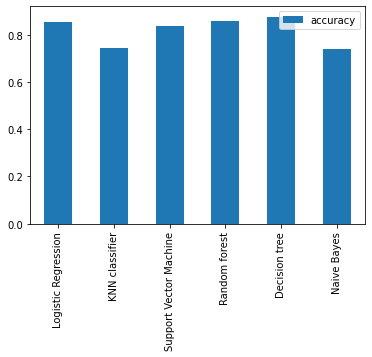

In [ ]:
model_compare.T.plot(kind='bar') 

By above analysis the Decision tree algorithm performs the better test accuracy score. So that we conclude that Decision tree algorithm is the best model for this problem statement
